# 引導聚集分類(Baggin Classifier)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from random import choices

# Training Data

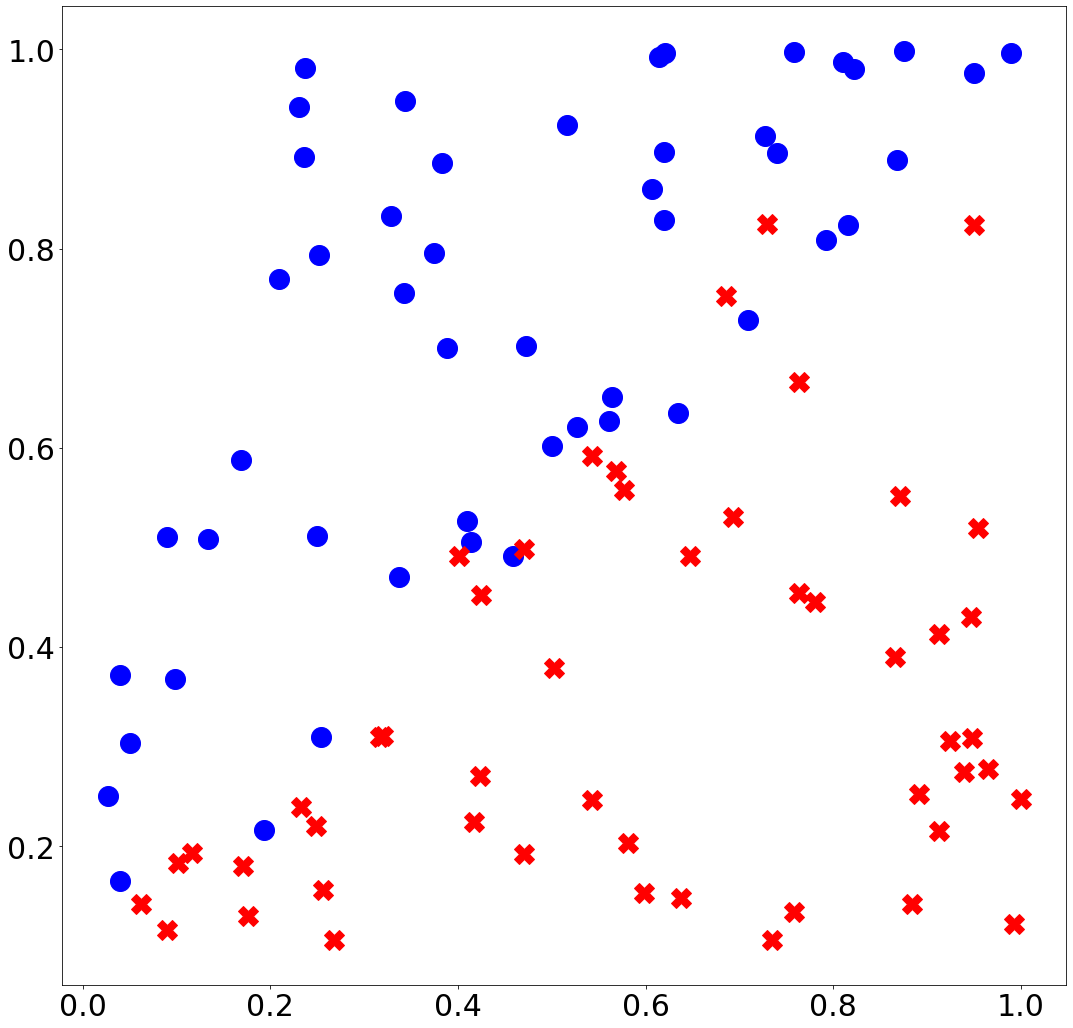

In [2]:
x=np.zeros((100,2))
y=np.zeros(100)
for i in range(0,100): 
    f=-0.1
    if(i<50):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)
    else:
        y[i]=-1
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Testing Data

In [3]:
N_test=20
x_test=np.zeros((N_test,2))
y_test=np.zeros(N_test)
for i in range(0,N_test): 
    f=-0.1
    if(i<N_test/2):
        y_test[i]=1
        x_test[i,0]=random.random()
        x_test[i,1]=random.uniform(x_test[i,0],1)
    else:
        y_test[i]=-1
        x_test[i,0]=random.random()
        x_test[i,1]=random.uniform(0,x_test[i,0])-f

# Polynomial Kernel

In [4]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    return (zeta+gamma*np.dot(x,xx.T))**power

# Support Vector Machine

In [5]:
def SVM(x,y,c,CC,gamma,zeta,N):
    Q = cvxopt.matrix((np.outer(y,y) * Polynomial_kernel(x,x,c,gamma,zeta)))
    p = cvxopt.matrix(np.ones(N)*-1.,(N,1))
    G = cvxopt.matrix(np.concatenate([np.diag(np.ones(N)* 1.),np.diag(np.ones(N)* -1.)])) 
    h = cvxopt.matrix(np.concatenate([CC*np.ones(N),np.zeros(N)]))
    A = cvxopt.matrix(y,(1,N))
    b = cvxopt.matrix(0.0)
    cvxopt.solvers.options['show_progress'] = False
    cvxopt.solvers.options['abstol'] = 1e-10
    cvxopt.solvers.options['reltol'] = 1e-10
    cvxopt.solvers.options['feastol'] = 1e-10
    a=np.array(cvxopt.solvers.qp(Q, p, G, h, A, b)['x']).flatten()
    SV=[]
    for i in range(0,N):
        if(a[i]>1e-6):
            SV.append(i)
    for sv in SV:
        if(y[sv]==1):
            s_u=sv
            break
    Com=0
    for i in range(0,N):
        Com+=y[i]*a[i]*Polynomial_kernel(x[i,:],x[s_u,:],c,gamma,zeta)
    b_u=y[s_u]-Com
    for sv in SV:
        if(y[sv]==-1):
            s_l=sv
            break
    Com=0
    for i in range(0,N):
        Com+=y[i]*a[i]*Polynomial_kernel(x[i,:],x[s_l,:],c,gamma,zeta)
    b_l=y[s_l]-Com
    return a,(b_u+b_l)/2

# Plot

In [6]:
def PLOT(x,y,c,gamma,zeta,a,b,classifier,sol):
    COLOR=["#ff0000","#00ff00","#0000ff","#ffff00","#ff00ff","#00ffff",
           "#7fff00","#7f00ff","#ff7f00","#007fff","#ff007f","#00ff7f"]
    COL=COLOR[classifier]
    LABEL="SVM model "+str(classifier+1)
    mul=a*y
    x1=np.linspace(min(x[:,0]),max(x[:,0]),sol)
    x2=np.linspace(min(x[:,1]),max(x[:,1]),sol)
    #plt.rcParams["figure.figsize"] = (18,18)
    temp_a_1=np.zeros((sol,sol))
    for i in range(0,sol):
        temp_array=np.zeros((sol,2))
        temp_array[:,0],temp_array[:,1]=x1,np.ones(sol)*x2[i]
        temp_a_1[:,i]=np.dot(Polynomial_kernel(temp_array,x,c,gamma,zeta),mul)+b
        for j in range(0,len(temp_a_1)-1):
            if(np.sign(temp_a_1[j,i])!=np.sign(temp_a_1[j+1,i])):
                plt.plot((x1[j]+x1[j+1])/2,x2[i],marker=".",c=COL)
    temp_a_2=np.zeros((sol,sol))
    for i in range(0,sol):
        temp_array=np.zeros((sol,2))
        temp_array[:,0],temp_array[:,1]=np.ones(sol)*x1[i],x2
        temp_a_2[:,i]=np.dot(Polynomial_kernel(temp_array,x,c,gamma,zeta),mul)+b
        for j in range(0,len(temp_a_2)-1):
            if(np.sign(temp_a_2[j,i])!=np.sign(temp_a_2[j+1,i])):
                plt.plot(x1[i],(x2[j]+x2[j+1])/2,marker=".",c=COL)
    plt.plot(x1[i],(x2[j]+x2[j+1])/2,marker=".",c=COL,label=LABEL)
    return temp_a_1,temp_a_2

# Bagging

SVM model 1 trainging error: 0.1 testing error: 0.1
SVM model 2 trainging error: 0.08 testing error: 0.05
SVM model 3 trainging error: 0.12 testing error: 0.1
SVM model 4 trainging error: 0.11 testing error: 0.0
SVM model 5 trainging error: 0.13 testing error: 0.1
SVM model 6 trainging error: 0.1 testing error: 0.1
SVM model 7 trainging error: 0.1 testing error: 0.05
SVM model 8 trainging error: 0.11 testing error: 0.05
SVM model 9 trainging error: 0.11 testing error: 0.15
SVM model 10 trainging error: 0.11 testing error: 0.1
SVM model 11 trainging error: 0.2 testing error: 0.25
SVM model 12 trainging error: 0.09 testing error: 0.05
Bagging trainging error: 0.09 testing error: 0.1


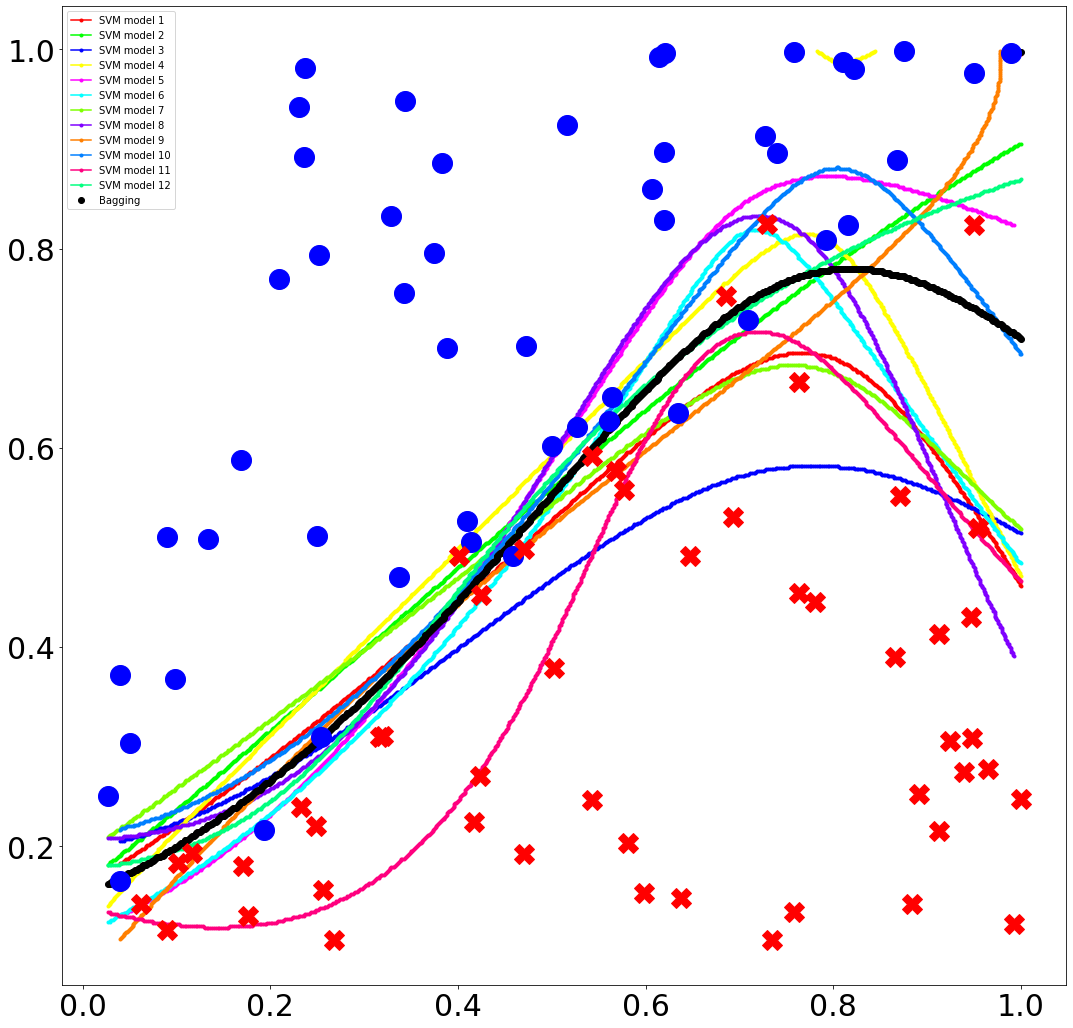

In [7]:
# c: 次方數
# CC: SVM的
# zeta,gamma: Polynomail參數
c=5
CC=100
zeta,gamma=1,1
N=100
# T: sub-models數量
# sol: 分類線的解析度
T=12
sol=500
# MIX_array用來存放數據點帶入分割線方程式f(x)的值
# MIX_f用來存放x帶入分割線方程式f(x)的值
MIX_array_1=np.zeros((sol,sol))
MIX_array_2=np.zeros((sol,sol))
MIX_f=np.zeros(N)
MIX_f_test=np.zeros(N_test)
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,T):
    classifier="SVM model "+str(i+1)
    # 從0~N隨機取N個數據(可重複)
    seed=choices(range(0,N), k=N)
    # 執行SVM演算法
    a,b=SVM(x[seed,:],y[seed],c,CC,gamma,zeta,N)
    # 分別算出訓練集和測試集帶入f(x)的值
    f=np.dot(Polynomial_kernel(x,x[seed],c,gamma,zeta),a*y[seed])+b
    f_test=np.dot(Polynomial_kernel(x_test,x[seed],c,gamma,zeta),a*y[seed])+b
    # 將這些全部加到MIX_f和MIX_f_test
    MIX_f+=f
    MIX_f_test+=f_test
    # 輸出錯誤率
    print(classifier,"trainging error:",round(1-sum(np.sign(f)==y)/N,2),
          "testing error:",round(1-sum(np.sign(f_test)==y_test)/N_test,2))
    # 繪圖
    temp_1,temp_2=PLOT(x[seed],y[seed],c,gamma,zeta,a,b,i,sol)
    # 把計算矩陣加到MIX_array裡面
    MIX_array_1+=temp_1
    MIX_array_2+=temp_2
# 最後全部除上sub-model數量 --> 這裡同等於Ensemble Averaging
MIX_array_1/=T
MIX_array_2/=T
MIX_f/=T
MIX_f_test/=T
##################### BAGGING #####################
print("Bagging trainging error:",round(1-sum(np.sign(MIX_f)==y)/N,2),
      "testing error:",round(1-sum(np.sign(MIX_f_test)==y_test)/N_test,2))
# Bagging分割線
x1=np.linspace(min(x[:,0]),max(x[:,0]),sol)
x2=np.linspace(min(x[:,1]),max(x[:,1]),sol)
for i in range(0,sol):
    for j in range(0,len(MIX_array_1)-1):
        if(np.sign(MIX_array_1[j,i])!=np.sign(MIX_array_1[j+1,i])):
            plt.plot((x1[j]+x1[j+1])/2,x2[i],"ko")
for i in range(0,sol):
    for j in range(0,len(MIX_array_2)-1):
        if(np.sign(MIX_array_2[j,i])!=np.sign(MIX_array_2[j+1,i])):
            plt.plot(x1[i],(x2[j]+x2[j+1])/2,"ko")
plt.plot(x1[i],(x2[j]+x2[j+1])/2,"ko",label="Bagging")
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()